<a href="https://colab.research.google.com/github/Henriquerezer/Machine_Learning/blob/main/Desafio_INDICIUM/Modelo_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#Bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
#Metrics
from sklearn.metrics import accuracy_score
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from sklearn.metrics import roc_auc_score
from yellowbrick.classifier import ROCAUC
from sklearn.metrics import average_precision_score

In [7]:
treinoX = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/yearly_wage_tratado')

treinoy = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/wage_train.csv')
treinoy['yearly_wage'] = treinoy['yearly_wage'].map({' <=50K': 1, ' >50K': 0})
treinoy = treinoy['yearly_wage']

Treinando modelo XGBOOST

In [13]:
X_train, X_test, y_train, y_test = train_test_split(treinoX, treinoy, test_size = 0.3, random_state = 42)
XGBoost = XGBClassifier(learning_rate = 0.1, max_depth = 5, min_child_weight =1, n_estimators = 150, subsample = 1). fit(X_train, y_train)
pred = XGBoost.predict(X_test)
acc = accuracy_score(y_test, pred)
print('Acurácia do modelo = ', acc )

Acurácia do modelo =  0.8733619983619983


**Métricas**

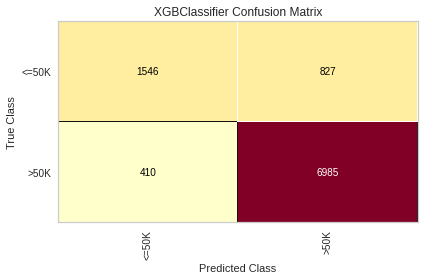

In [24]:
cm = ConfusionMatrix(XGBoost, classes=["<=50K", ">50K"])
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.poof();

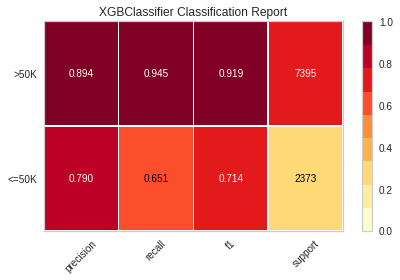

In [23]:
classes = ["<=50K", ">50K"]

visualizer = ClassificationReport(XGBoost, classes=classes, support=True)

visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();                      

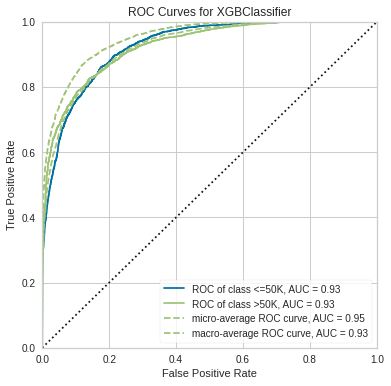

In [29]:
fig,ax = plt.subplots(figsize=(6,6))
roc_viz = ROCAUC(XGBoost, classes= ["<=50K", ">50K"])
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.poof();

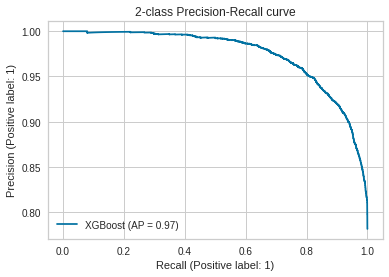

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    XGBoost, X_test, y_test, name="XGBoost"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

# Dataset de test

In [40]:
teste = pd.read_csv('https://raw.githubusercontent.com/Henriquerezer/Machine_Learning/main/Desafio_INDICIUM/wage_test.csv')
teste.head()

,Unnamed: 0,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
1,1,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
2,2,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
3,3,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States
4,4,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States


In [41]:
#transformação data teste
#Definindo uma função para realizar a transformação.
def Transf(dados):
  #Remoção das variaveis que não serão utilizadas
  dados.drop('race', axis = 1, inplace = True)
  dados.drop('native_country', axis = 1, inplace = True)
  dados.drop('Unnamed: 0', axis = 1,  inplace = True)

  #Transformação de variáveis categóricas para numéricas
  dados['workclass']        = dados['workclass'].map({' Self-emp-not-inc' :0,  ' Private' :1, ' State-gov' :2, ' Federal-gov' :3,' Local-gov' :4, ' ?' :5, ' Self-emp-inc' :6, ' Without-pay' :7,' Never-worked' :8 })
  dados['education']        = dados['education'].map({' Bachelors' :0, ' HS-grad' :1, ' 11th' :2, ' Masters' :3, ' 9th' :4,' Some-college' :5, ' Assoc-acdm' :6, ' Assoc-voc' :7, ' 7th-8th' :8,' Doctorate' :9, ' Prof-school' :10, ' 5th-6th' :11, ' 10th' :12, ' 1st-4th' :13,' Preschool' :14, ' 12th' :15})
  dados['marital_status']   = dados['marital_status'].map({' Married-civ-spouse' :0, ' Divorced' :1, ' Married-spouse-absent' :2,' Never-married' :3, ' Separated' :4, ' Married-AF-spouse' :5, ' Widowed' :6})
  dados['occupation']       = dados['occupation'].map({' Exec-managerial' :0, ' Handlers-cleaners' :1, ' Prof-specialty' :2,' Other-service' :3, ' Adm-clerical' :4, ' Sales' :5, ' Craft-repair':6,' Transport-moving' :7, ' Farming-fishing' :8, ' Machine-op-inspct' :9, ' Tech-support' :10, ' ?' :11, ' Protective-serv' :12, ' Armed-Forces' :13, ' Priv-house-serv' :14})
  dados['relationship']     = dados['relationship'].map({' Husband' :0, ' Not-in-family' :1, ' Wife' :2, ' Own-child' :3, ' Unmarried' :4,' Other-relative' :5})
# dados['race']             = dados['race'].map({' White' :0, ' Black' :1, ' Asian-Pac-Islander' :2, ' Amer-Indian-Eskimo' :3,' Other' :4})
  dados['sex']              = dados['sex'].map({' Male' :0, ' Female' :1})
# dados['native_country']   = dados['native_country'].map({' United-States' :0, ' Cuba' :1, ' Jamaica':2, ' India' :3, ' ?' :4, ' Mexico' :5,' South' :6, ' Puerto-Rico' :7, ' Honduras' :8, ' England' :9, ' Canada' :10,' Germany' :11, ' Iran' :12, ' Philippines' :13, ' Italy' :14, ' Poland' :15,' Columbia' :16, ' Cambodia' :17, ' Thailand' :18, ' Ecuador' :19, ' Laos' :20,' Taiwan' :21, ' Haiti' :22, ' Portugal' :23, ' Dominican-Republic' :24,' El-Salvador' :25, ' France' :26, ' Guatemala' :27, ' China' :28, ' Japan' :29,' Yugoslavia' :30, ' Peru' :31, ' Outlying-US(Guam-USVI-etc)' :32, ' Scotland' :33,' Trinadad&Tobago' :34, ' Greece' :35, ' Nicaragua' :36, ' Vietnam' :37, ' Hong' :38,' Ireland' :39, ' Hungary' :40, ' Holand-Netherlands' :41})

  #normalização dos dados, mantendo os dados em uma escala de 0 a 1
  dados['fnlwgt']           = dados['fnlwgt'] / 1.48e6
  dados['education_num']    = dados['education_num'] / 16
  dados['hours_per_week']   = dados['hours_per_week'] / 99
  dados['capital_gain']     = dados['capital_gain'] / 99999
  dados['capital_loss']     = dados['capital_loss'] / 4356
  dados['age']              = dados['age'] / 90
  
  #Dummyficação das variáveis que transformamos em numéricas
  variaveis_para_Dummie     = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'sex']
  dados = pd.get_dummies(dados, columns = variaveis_para_Dummie, drop_first = True)

  return dados

teste = Transf(teste)

In [46]:
teste.shape

(16280, 55)

In [43]:
pred2 = XGBoost.predict(teste)

In [61]:
submissao = pd.DataFrame()


In [62]:
submissao['predictedValues'] = pred2

In [63]:
submissao

,predictedValues
0,1
1,1
2,0
3,1
4,1
...,...
16275,1
16276,1
16277,0
16278,1


In [64]:
# Envie o resultado final do modelo em uma planilha com apenas duas colunas (rowNumber, predictedValues). 

submissao.to_csv('predictedValues', index = True)